Test Accuracy: 0.835


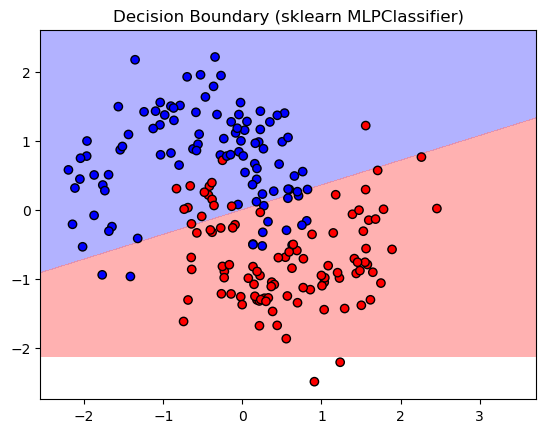

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic',
                      solver='adam', learning_rate_init=0.1,
                      max_iter=2000, random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)
Z = model.predict_proba(grid_scaled)[:,1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0,0.5,1], alpha=0.6, cmap="bwr")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolor="k", cmap="bwr")
plt.title("Decision Boundary (sklearn MLPClassifier)")
plt.show()